AUC: 0.7993
Average Precision (AP): 0.7366

Confusion Matrix:
[[613  84]
 [372 325]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.88      0.73       697
           1       0.79      0.47      0.59       697

    accuracy                           0.67      1394
   macro avg       0.71      0.67      0.66      1394
weighted avg       0.71      0.67      0.66      1394



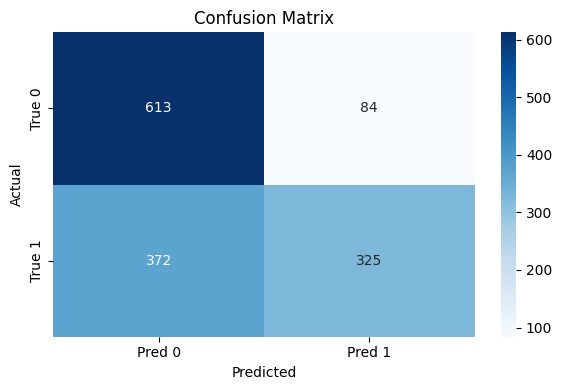


Sample Predictions:
                    user1                   user2     score  actual  predicted
0  s3U0QDgbVsD_gnmtfTqZgg  nr35WjC-YI0dFcsnW33Szw  0.116071       1          1
1  fuaMlZMm-Gwby3pYpYItbQ  T-fEzc9c5S_1G1eeZBtXcw  0.157895       1          1
2  uDFNUZcsK4HZbV4tOjjU1w  LWVjat_YkMQy4nOlD0hc_w  0.189474       1          1
3  C3Hpsx_eDfeSmxEc1HBzpA  SyABteXA7u_-GA2nKLJ-XQ  0.029178       1          0
4  xqvAeGXOtCKd5z3b7kUauA  BnBQ0UU9uSiI_0cbCZ4lsw  0.183673       1          1
5  hL327vQ6JIANtQWGCEZHMw  Yj4SpqG0OJxbg8L1Qsrlsw  0.220472       1          1
6  C3Hpsx_eDfeSmxEc1HBzpA  OGDbYGyboe1lgtgzYb_Rxg  0.010753       1          0
7  zQTEbn5nWGPypxOf2uRPmg  hKBQ-PFlcB-t5FK3HUxoyQ  0.133333       1          1
8  hKBQ-PFlcB-t5FK3HUxoyQ  oF20BNxcphfedn93Nfwd9w  0.178295       1          1
9  BCS9GXE7YNDwlRN9TYELnw  PUj5BTAscm67FZQkqe2qwQ  0.166667       1          1


In [3]:
import networkx as nx
import pandas as pd
import random
from networkx.algorithms.link_prediction import jaccard_coefficient
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load user-user edges
user_df = pd.read_csv('/Users/jaeeponde/dsm_project/cleaned/st_louis_user_edges.csv')

# Create undirected graph
G = nx.Graph()
G.add_edges_from(user_df[['user_id_1', 'user_id_2']].values)

# --- Train-test split ---
edges = list(G.edges())
random.shuffle(edges)
split = int(len(edges) * 0.1)

test_pos_edges = edges[:split]
G_train = G.copy()
G_train.remove_edges_from(test_pos_edges)

non_edges = list(nx.non_edges(G_train))
test_neg_edges = random.sample(non_edges, split)

# --- Compute Jaccard scores ---
pred_pos = list(jaccard_coefficient(G_train, test_pos_edges))
pred_neg = list(jaccard_coefficient(G_train, test_neg_edges))

# --- Combine predictions ---
y_true = [1] * len(pred_pos) + [0] * len(pred_neg)
y_scores = [score for _, _, score in pred_pos] + [score for _, _, score in pred_neg]
threshold = 0.1  # You can adjust this based on analysis

y_pred = [1 if score > threshold else 0 for score in y_scores]

# --- Evaluation ---
auc = roc_auc_score(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)
cm = confusion_matrix(y_true, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Average Precision (AP): {ap:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# --- Detailed Predictions DataFrame ---
predictions_df = pd.DataFrame({
    'user1': [u for u, v, _ in pred_pos + pred_neg],
    'user2': [v for u, v, _ in pred_pos + pred_neg],
    'score': y_scores,
    'actual': y_true,
    'predicted': y_pred
})

print("\nSample Predictions:")
print(predictions_df.head(10))


AUC: 0.9035
Average Precision (AP): 0.9157

Confusion Matrix:
[[425 272]
 [ 61 636]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72       697
           1       0.70      0.91      0.79       697

    accuracy                           0.76      1394
   macro avg       0.79      0.76      0.76      1394
weighted avg       0.79      0.76      0.76      1394



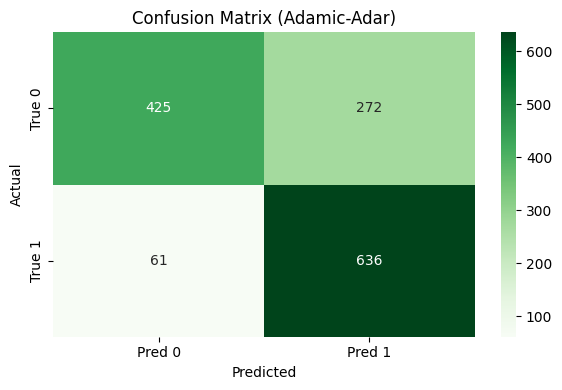


Sample Predictions (Adamic-Adar):
                    user1                   user2     score  actual  predicted
0  -4vkTh2rImD8c0-30h2uvw  0ikReUVUjKPtxajKx494ug  1.096906       1          1
1  V3XYG1zKuW8VUBNtjacoxA  KXX_KFF_TS2cKrg2_2RfSA  0.000000       1          0
2  V3XYG1zKuW8VUBNtjacoxA  ajMRe3S3yGbsH0IneTRsQg  0.773178       1          1
3  UlWDGR0QrBbdFsVY6ugocw  r8w6lzdOye_84x1p7NPHWg  0.214871       1          1
4  YE3NsQGCoCu4WHaKQ3Kddg  XhrlkiNB867EmtYuDTcq7Q  2.683130       1          1
5  V3XYG1zKuW8VUBNtjacoxA  SyABteXA7u_-GA2nKLJ-XQ  2.850130       1          1
6  nr35WjC-YI0dFcsnW33Szw  7XCUXcd3Pg0XppvBwO5x7A  2.363394       1          1
7  IdZkKL0NLgx336-MeLJf3A  mKBl4fAqTfNts7B78aOPVg  7.674312       1          1
8  FbON24rvSxUjGjUWhuCdOg  rRrFcSEZOTw6iZagsIwTFQ  1.065061       1          1
9  PKtQA1Ui28M3W6Jr32tJ_w  a2BZP3YiYPE9XnC-g7UJUQ  0.168570       1          1


In [4]:
import networkx as nx
import pandas as pd
import random
from networkx.algorithms.link_prediction import adamic_adar_index
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load user-user edges
uuser_df = pd.read_csv('/Users/jaeeponde/dsm_project/cleaned/st_louis_user_edges.csv')

# Create undirected graph
G = nx.Graph()
G.add_edges_from(user_df[['user_id_1', 'user_id_2']].values)

# --- Train-test split ---
edges = list(G.edges())
random.shuffle(edges)
split = int(len(edges) * 0.1)

test_pos_edges = edges[:split]
G_train = G.copy()
G_train.remove_edges_from(test_pos_edges)

non_edges = list(nx.non_edges(G_train))
test_neg_edges = random.sample(non_edges, split)

# --- Compute Adamic-Adar scores ---
pred_pos = list(adamic_adar_index(G_train, test_pos_edges))
pred_neg = list(adamic_adar_index(G_train, test_neg_edges))

# --- Combine predictions ---
y_true = [1] * len(pred_pos) + [0] * len(pred_neg)
y_scores = [score for _, _, score in pred_pos] + [score for _, _, score in pred_neg]

# Threshold for classification (can be tuned)
threshold = 0.1
y_pred = [1 if score > threshold else 0 for score in y_scores]

# --- Evaluation ---
auc = roc_auc_score(y_true, y_scores)
ap = average_precision_score(y_true, y_scores)
cm = confusion_matrix(y_true, y_pred)

print(f"AUC: {auc:.4f}")
print(f"Average Precision (AP): {ap:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# --- Visualize Confusion Matrix ---
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix (Adamic-Adar)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

# --- Detailed Predictions DataFrame ---
predictions_df = pd.DataFrame({
    'user1': [u for u, v, _ in pred_pos + pred_neg],
    'user2': [v for u, v, _ in pred_pos + pred_neg],
    'score': y_scores,
    'actual': y_true,
    'predicted': y_pred
})

print("\nSample Predictions (Adamic-Adar):")
print(predictions_df.head(10))
